<a href="https://colab.research.google.com/github/ruanraian/1adt-fase1-tech-challenge/blob/tc/tech-challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Enunciado do tech challenge

## O problema

Você é um profissional encarregado de desenvolver um modelo preditivo de regressão para prever o valor dos custos médicos individuais cobrados pelo seguro de saúde.

A base de dados do desafio é o arquivo CSV anexo ao projeto.


## Tarefas

### Exploração de dados:

*   Carregue a base de dados e explore suas características.
*   Analise estatísticas descritiva e visualize distribuições relevantes.

### Pré processamento de dados:

* Realize a limpeza dos dados, tratando valores ausentes se necessário.
* Converta variáveis catégóricas em formatos adequados para modelagem

### Modelagem:

* Crie um modelo preditivo de regressão utilizando uma técnica à sua escolha (por exemplo, Regressão linear, Árvores de decisão, etc).
* Divida o conjunto de dados entre treinamento e teste.

### Treinamento e avaliação do modelo:

* Treine o modelo com conjunto de treinamento.

### Validação estatística:

* Utilize métricas estatísticas para validar a eficácia do modelo (p-value, intervalos de confiança).

### O que avaliaremos:

Apresente resultados visuais, como gráficos de previsões vs. valores reais.
Elabore um relatório que inclua uma análise dos resultados, insights obtidos e validação estatística.

### Observações:

Esperamos que o modelo seja capaz de fazer previsões confiáveis dos custos médicos individuais com base nas características fornecidas.

## Entregável

Como entregável, o grupo deve enbiar um vídeo junto com o link do github do projeto e o código desenvolvido, apresentando o passo a passo do que foi utilizado como a fonte de dados e como os modelos foram criados.

O vídeo deve estar em uma plataforma como Youtube.



# Importando e Explorando os dados


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:

dataset = pd.read_csv("insurance.csv")
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Entendo melhor os dados a serem trabalhados

In [6]:
dataset.shape

(1338, 7)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Felizmente não nos deparamos com dados nulos no modelo, porém temos dados de tipo object, vamos tentar entender eles um pouco melhor...

In [8]:
set(dataset["region"])


{'northeast', 'northwest', 'southeast', 'southwest'}

In [9]:
dataset["region"].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

Analisando os tipos de dados numéricos com describe

In [10]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Tentando entender melhor as distribuições com histogramas


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

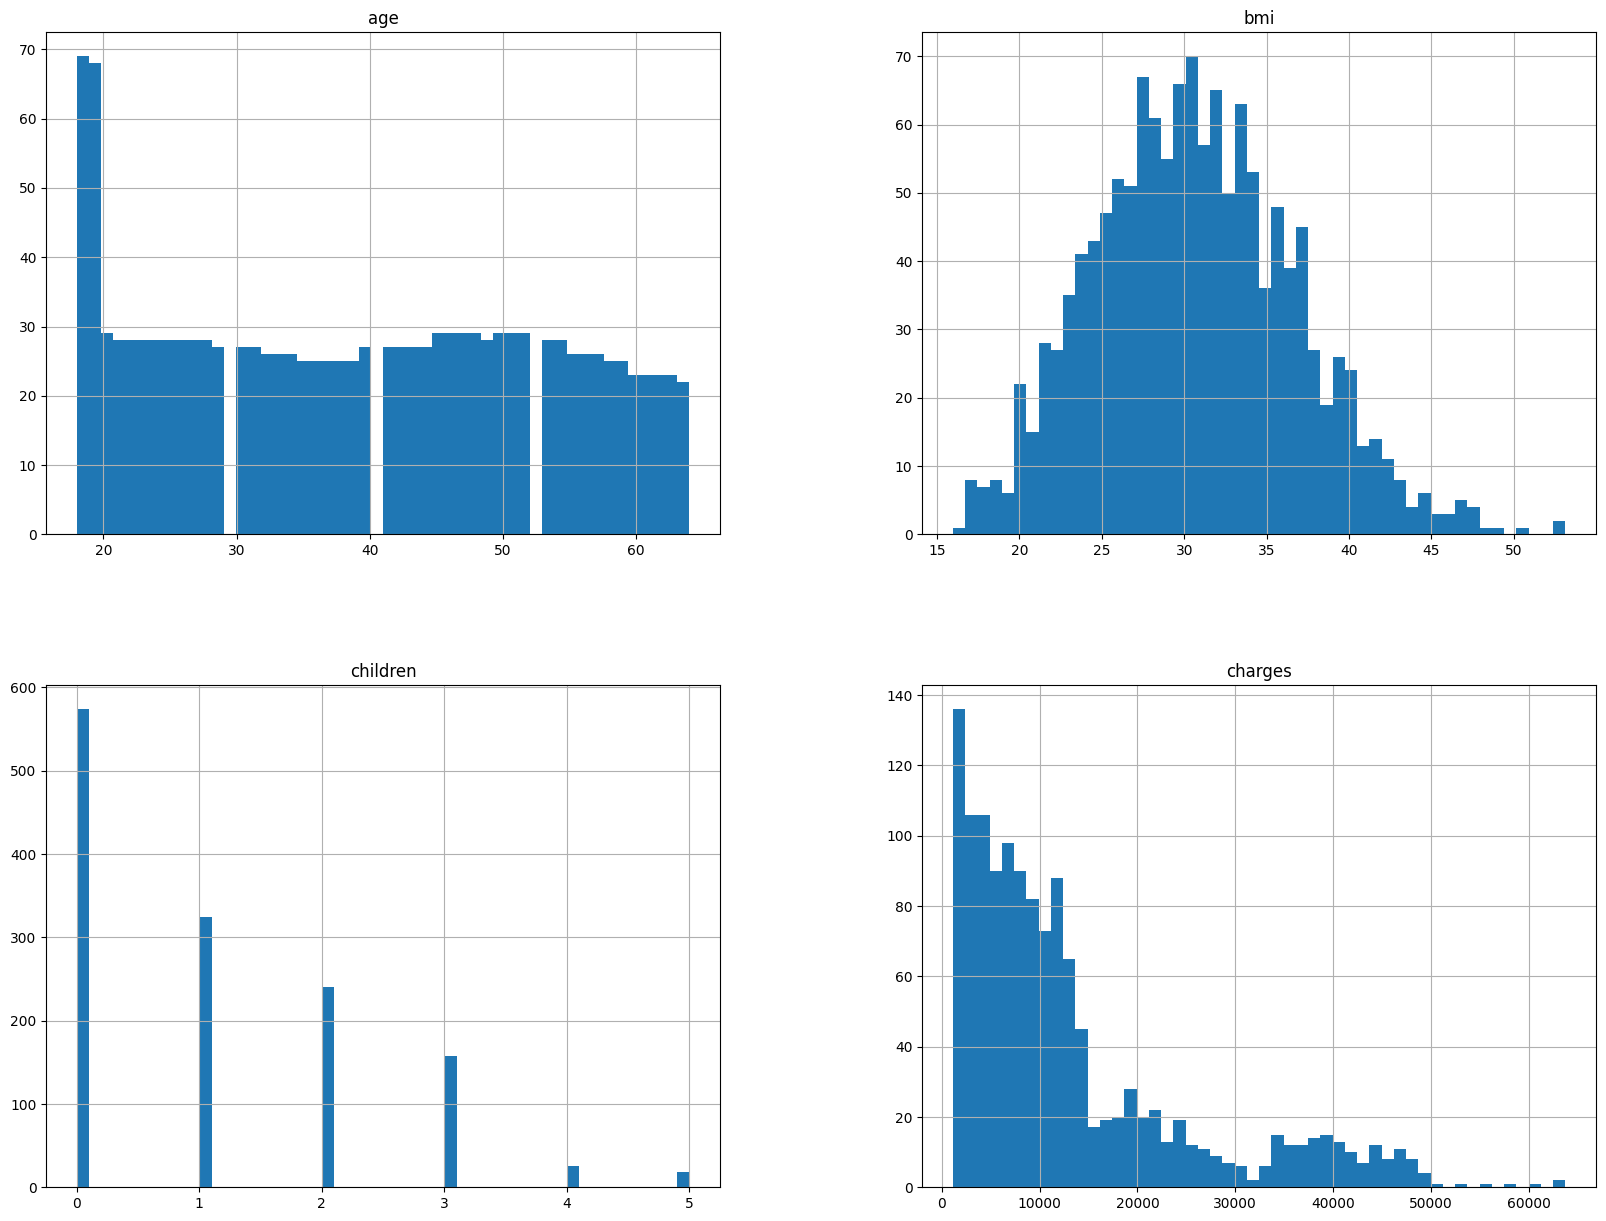

In [11]:
%matplotlib inline
dataset.hist(bins=50, figsize=(20,15))

Obervações iniciais:

* A distribuição de idade inicialmente me parece confusa de ser lida, mas aparentemente é uniforme exceto pela faixa inferior a 20 anos.
* Talvez exista uma relação entre o volume alto de seguros na faixa dos 20- anos e 0 children.
* Parece haver assimetria nos dados.

As coisas seguem não muito claras, talvez faça sentido plotar alguns boxplots pra entender melhor a distribuição dessas variáveis.

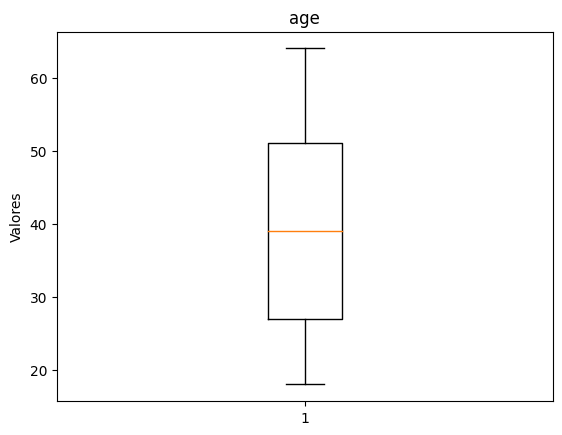

In [13]:
plt.boxplot(dataset['age'])
plt.title('age')
plt.ylabel('Valores')
plt.show()

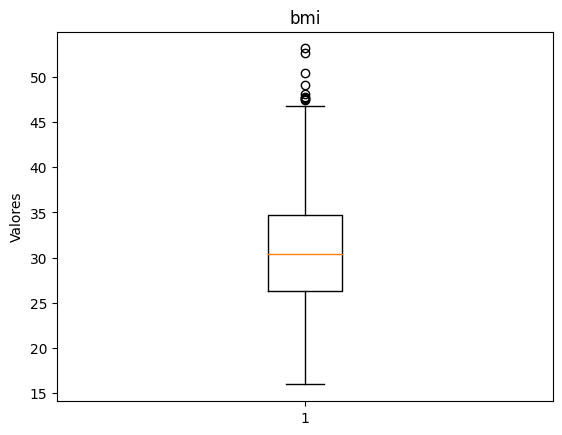

In [14]:
plt.boxplot(dataset['bmi'])
plt.title('bmi')
plt.ylabel('Valores')
plt.show()

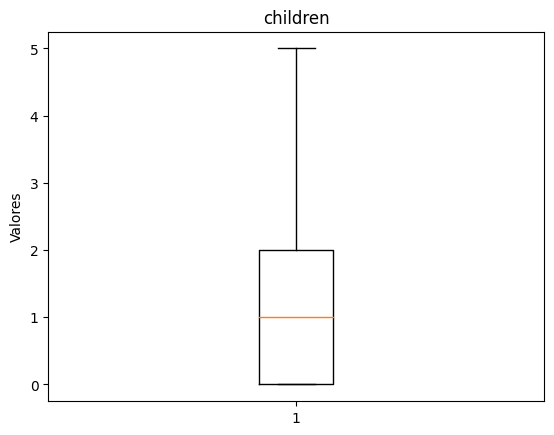

In [15]:
plt.boxplot(dataset['children'])
plt.title('children')
plt.ylabel('Valores')
plt.show()

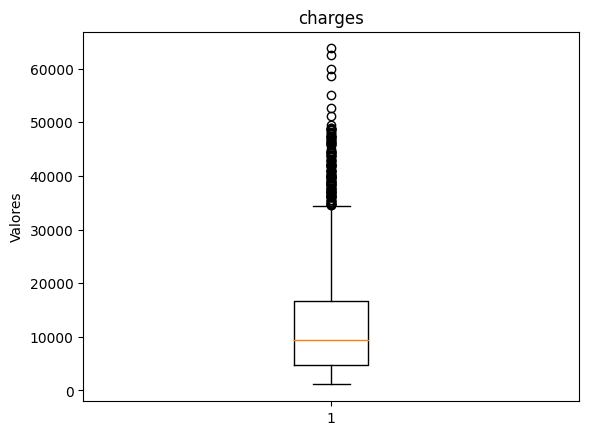

In [16]:
plt.boxplot(dataset['charges'])
plt.title('charges')
plt.ylabel('Valores')
plt.show()

# Pré processando os dados


Aparentemente os dados estão em escalas diferentes e entendemos que tudo bem estarem, podemos tratar isso mais pra frente. Antes disso talvez seja interessante transformarmos os dados não numéricos. Vamos visualizar o antes e depois por aqui...


In [18]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Transformando os dados e os reapresentando:

In [20]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
dataset['sex'] = label_encoder.fit_transform(dataset['sex'])
dataset['smoker'] = label_encoder.fit_transform(dataset['smoker'])
dataset['region'] = label_encoder.fit_transform(dataset['region'])

dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


Separando treinamento e teste

In [21]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(dataset, test_size = 0.2, random_state = 7)

In [22]:
print(len(df_train), "treinamento +", len(df_test), "teste")

1070 treinamento + 268 teste


## Buscando Correlacoes entre os dados


In [24]:
corr_matrix = dataset.corr()
corr_matrix

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


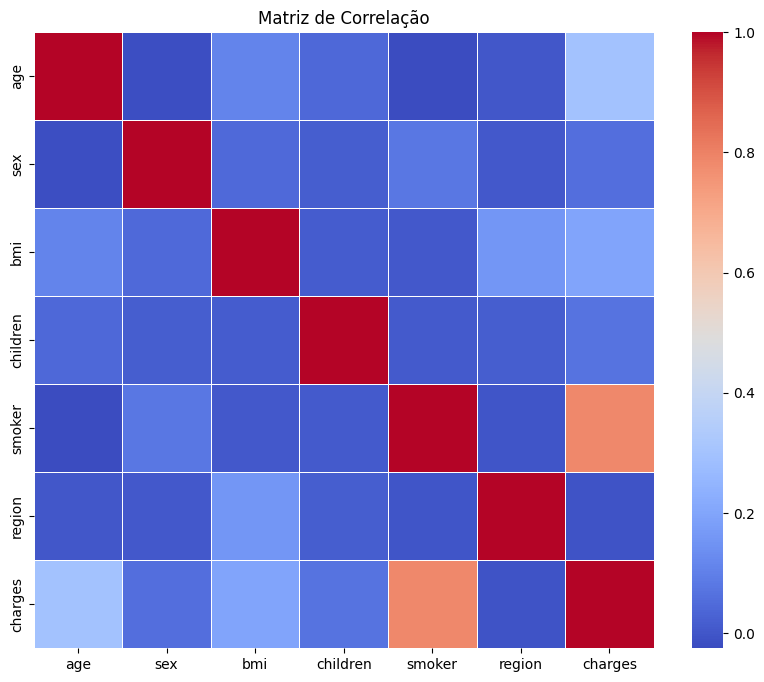

In [25]:
import seaborn as sns
# Visualização da matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação')
plt.show()

Aparentemente, existe algum tipo de correlação maior com o fato do segurado ser fumante e os custos relacionados ao seguro, seguidos de idade e IMC